In [130]:
%load_ext autoreload
%autoreload 2

import pydicom as dm
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import cv2
import imageio
import shutil

# My scripts
#os.chdir('../')
from src import image_manip

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dicom Image manipulation

In [15]:
#os.chdir('../')

dicom = dm.dcmread('1-1.dcm')
array = dicom.pixel_array

rows, cols = array.shape

row_inc = int(round(0.05*rows))
col_inc = int(round(0.05*cols))               
arr = array[row_inc:rows-row_inc, col_inc:cols-col_inc] 


image = cv2.resize(arr, (int(cols * 0.4), int(rows * 0.4)))
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
image = np.uint8(image)
print(os.getcwd())
cv2.imwrite("testimage4.jpg", image)

/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/data/Mammograms


True

In [45]:
os.getcwd()

'/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction'

In [22]:
# Full directory

path = '/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/data/CBIS-DDSM'
os.chdir(path)
dirs = [d for d in os.listdir()]

for d in dirs:
    path = os.path.join(os.getcwd(), d)
    for root,dirs,files in os.walk(path):
        for f in files:
            file_path = os.path.join(root,f)
            #print(file_path)

            try:
                dicom = dm.dcmread(file_path)
                array = dicom.pixel_array

                # Crop 10% off all sides
                rows, cols = array.shape
                row_inc = int(round(0.05*rows))
                col_inc = int(round(0.05*cols))

                arr = array[row_inc:rows-row_inc, col_inc:cols-col_inc]            

                    # Save as image. Matplotlib adds lots of crap we don't want
                image = cv2.resize(arr, (int(cols * 0.4), int(rows * 0.4)))
                image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
                image = np.uint8(image)
                cv2.imwrite(f'{d}.png', image)
                              
            except:
                print(d)               


/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/data/Mammograms/CBIS-DDSM


## Normal mammograms (ljpeg)
Cropping and resizing mammograms. This will eventually be integrated into fixing AR

In [ ]:
files = [f for f in os.listdir(path)]
for f in files:
    image_manip.crop_mammograms(f)

In [55]:
# Cropping and resizing mammogram images
path = '/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/data/Mammograms/normals/mlo'
os.chdir(path)
img_path = 'A_0200_1.RIGHT_MLO.jpg'
def crop_mammograms(img_path):
    
    # Read image
    im = cv2.imread(img_path)
    image_name = os.path.splitext(img_path)[0]
    
    # Crop and normalize
    rows, cols, channels = im.shape
    row_inc = int(round(0.05*rows))
    col_inc = int(round(0.05*cols))

    arr = im[row_inc:rows-row_inc, col_inc:cols-col_inc, :] 
    image = cv2.resize(arr, (int(cols * 0.3), int(rows * 0.3)))
    cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    
    # Save
    image = np.uint8(image)
    cv2.imwrite(f'{image_name}.png', image)
    
    return 0    

crop_mammograms(img_path)

0

## Changing AR and size

In [139]:
path = '/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/data/Mammograms/normals/mlo/'
os.chdir(path)
files = [f for f in os.listdir() if '.png' in f]
for f in files:
    image_manip.uniform_size(f)


In [80]:
os.chdir('/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction')

## Image exploration

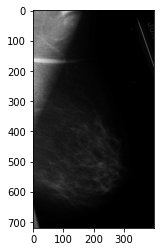

In [92]:
# Check image channels
img_path = 'data/Mammograms/normals/MLO/A_0200_1.RIGHT_MLO_ar.png'

im_io = imageio.imread(img_path)
im_cv = cv2.imread(img_path)
im_cv = cv2.normalize(im_cv, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(im_cv)

In [46]:
# im2_io = imageio.imread('data/Histology/40X/train/benign/SOB_B_TA-14-13200-40-008.png')
# im2_io.shape
cv2.normalize(im_cv2, None, 0, 255, cv2.NORM_MINMAX)

array([[[  2,   2,   2],
        [  6,   6,   6],
        [ 10,  10,  10],
        ...,
        [ 26,  26,  26],
        [ 31,  31,  31],
        [ 33,  33,  33]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  3,   3,   3],
        ...,
        [ 21,  21,  21],
        [ 25,  25,  25],
        [ 27,  27,  27]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [ 22,  22,  22],
        [ 27,  27,  27],
        [ 29,  29,  29]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]

In [43]:
#im_io[0]
im_cv2[0]

array([[ 2,  2,  2],
       [ 6,  6,  6],
       [10, 10, 10],
       ...,
       [26, 26, 26],
       [31, 31, 31],
       [33, 33, 33]], dtype=uint8)

In [142]:
## Separating cancer and non cancer images
path = '/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/data/Mammograms/normals/cancers'
os.chdir(path)
overlay_files = [f for f in os.listdir(path) if 'OVERLAY' in f]
image_files = [f for f in os.listdir(path) if '.png' in f]
overlay_names = [os.path.splitext(f)[0] for f in overlay_files]
print(len(overlay_files), len(image_files))

i = 0
for name in overlay_names:
    if name+'.png' in image_files:
        shutil.move(f'{name}.png', f'overlay/{name}.png')


158 320


In [127]:
a = ['cat', 'bat', 'at', 'rung']
'cat' in a

True